# Brain Stroke Prediction

<p align="center">
  <img src="image.jpg" alt="Brain Stroke">
</p>

In [ ]:
"""
Description:

    The program predicts whether a person would have a brain stroke or not. A stroke, also known as a brain attack,
    occurs when blood flow to a portion of the brain is obstructed or when a blood vessel in the brain ruptures. 
    In both scenarios, sections of the brain suffer damage or cease to function due to this occurrence. 
    Prevention is a crucial strategy to mitigate the risk of experiencing a stroke.

Resources:

    (1) Data Set I used: https://www.kaggle.com/datasets/jillanisofttech/brain-stroke-dataset?rvi=1
    (2) https://pandas.pydata.org/docs/user_guide/index.html
    (3) https://seaborn.pydata.org/generated/seaborn.pairplot.html
    (4) https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTEENN.html
    (5) https://scikit-learn.org/0.21/documentation.html
    (6) https://www.youtube.com/watch?v=7eh4d6sabA0&t=2569s
    (7) https://www.youtube.com/watch?v=OS2m0f2gVJ0&t=763s
    (8) https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html
    
"""

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# Models 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
# Load the data
brain_stroke_data = pd.read_csv('brain_stroke.csv')
brain_stroke_data.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [3]:
# Count the number of rows and columns
brain_stroke_data.shape

(4981, 11)

In [4]:
# Count the empty values in each column
brain_stroke_data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [5]:
# Clean data if there is missing values
# brain_stroke_data = brain_stoke_data.dropna(axis=1) 
# In my case I am removing the option 'Unknown' for smoking column

brain_stroke_data = brain_stroke_data[brain_stroke_data['smoking_status'] != 'Unknown']

In [6]:
# Count the number of strokes or no strokes
brain_stroke_data['stroke'].value_counts()

stroke
0    3280
1     201
Name: count, dtype: int64

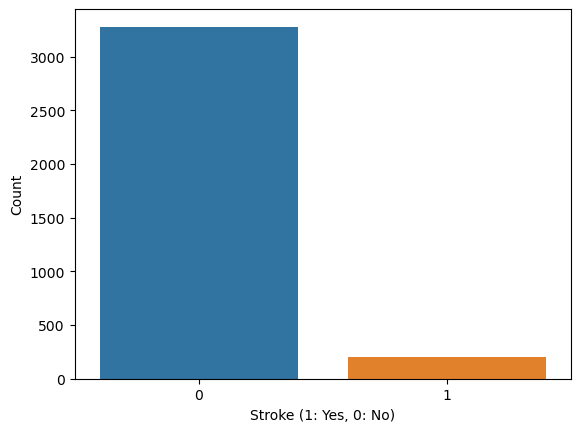

In [7]:
# Visualize this count
sns.countplot(x='stroke', data=brain_stroke_data)
plt.ylabel('Count')
plt.xlabel('Stroke (1: Yes, 0: No)')
plt.show()

In [8]:
# Look at the data that needs to be transformed to int or float
brain_stroke_data.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [9]:
# Define mapping dictionaries

gender_map = {'Male': 0, 'Female': 1}
married_map = {'No': 0, 'Yes': 1}
work_type_map = {'children': 0, 'Never worked': 1, 'Govt_job': 2, 'Private': 3, 'Self-employed': 4}
residence_map = {'Rural': 0, 'Urban': 1}
smoking_map = {'never smoked': 0, 'formerly smoked': 1, 'smokes': 2}

In [10]:
# Apply mappings to the DataFrame columns

brain_stroke_data['gender'] = brain_stroke_data['gender'].map(gender_map)
brain_stroke_data['ever_married'] = brain_stroke_data['ever_married'].map(married_map)
brain_stroke_data['work_type'] = brain_stroke_data['work_type'].map(work_type_map)
brain_stroke_data['Residence_type'] = brain_stroke_data['Residence_type'].map(residence_map)
brain_stroke_data['smoking_status'] = brain_stroke_data['smoking_status'].map(smoking_map)

In [11]:
# Visualize mapped data
brain_stroke_data.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,3,1,228.69,36.6,1,1
1,0,80.0,0,1,1,3,0,105.92,32.5,0,1
2,1,49.0,0,0,1,3,1,171.23,34.4,2,1
3,1,79.0,1,0,1,4,0,174.12,24.0,0,1
4,0,81.0,0,0,1,3,1,186.21,29.0,1,1


In [12]:
# Prepare features (x) and target variable (y)

x = brain_stroke_data.drop(columns=['stroke'])  # Features, excluding the target 'stroke'
y = brain_stroke_data['stroke']  # Target variable

In [13]:
# Because of significant disbalance in the dataset we must resample the data
# I am using SMOTE-ENN method

sampling_strategy = {1: 201 * 10}

smote_enn = SMOTEENN(sampling_strategy=sampling_strategy, random_state=42)
x_resampled, y_resampled = smote_enn.fit_resample(x, y)

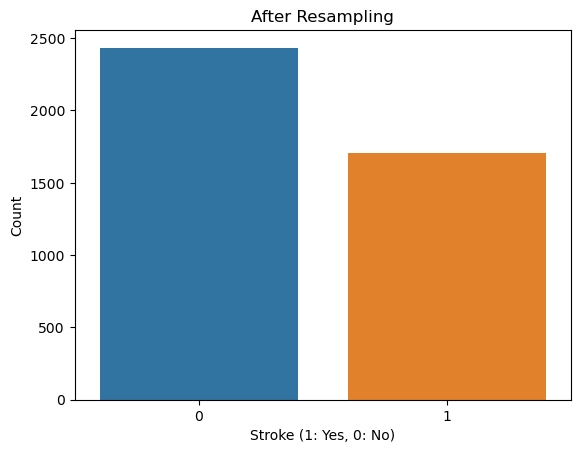

In [14]:
# Visualize the resampled version

sns.countplot(x=y_resampled)
plt.xlabel('Stroke (1: Yes, 0: No)')
plt.ylabel('Count')
plt.title('After Resampling')
plt.show()

In [15]:
# Split the dataset into 75% training set and 25% testing set

x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=0)

In [16]:
# Scale the data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [17]:
# Create a function with Machine Learning Models
def models(x_train, y_train):
    # Logistic Regression Algorithm
    log = LogisticRegression(random_state=0)
    log.fit(x_train, y_train)
    # KNeighborsClassifier (Nearest Neighbor algorithm)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(x_train, y_train)
    # SVC method (Support Vector Machine Algorithm)
    svc_lin = SVC(kernel='linear', random_state=0)
    svc_lin.fit(x_train, y_train)
    # SVC method (Kernel SVM Algorithm)
    svc_rbf = SVC(kernel='rbf', random_state=0)
    svc_rbf.fit(x_train, y_train)
    # RandomForestClassifier (Random Forest Classification Algorithm)
    forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
    forest.fit(x_train, y_train)
    # DesicionTreeClassifier (Decision Tree Algorithm)
    tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
    tree.fit(x_train, y_train)
    # GaussianNB method (Naive Bayes Algorithm)
    gauss = GaussianNB()
    gauss.fit(x_train, y_train)
    
    # Print model accuracy
    print('[0]Logistic Regression Training Accuracy:', log.score(x_train, y_train))
    print('[1]K Nearest Neighbor Training Accuracy:', knn.score(x_train, y_train))
    print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(x_train, y_train))
    print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(x_train, y_train))
    print('[4]Random Forest Classifier Training Accuracy:', forest.score(x_train, y_train))
    print('[5]Decision Tree Classifier Training Accuracy:', tree.score(x_train, y_train))
    print('[6]Gaussian Naive Bayes Training Accuracy:', gauss.score(x_train, y_train))
    
    return log, knn, svc_lin, svc_rbf, forest, tree, gauss

In [18]:
model = models(x_train, y_train)

[0]Logistic Regression Training Accuracy: 0.8574018126888218
[1]K Nearest Neighbor Training Accuracy: 0.9154078549848943
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.8564954682779456
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.8963746223564955
[4]Random Forest Classifier Training Accuracy: 0.9957703927492447
[5]Decision Tree Classifier Training Accuracy: 1.0
[6]Gaussian Naive Bayes Training Accuracy: 0.8114803625377643


In [19]:
for i in range(len(model)):
    cm = confusion_matrix(y_test, model[i].predict(x_test))

    TP = cm[0][0]
    TN = cm[1][1]
    FN = cm[1][0]
    FP = cm[0][1]

    print(cm)
    print('Model[{}] Testing Accuracy = "{}!"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
    print()

[[424  67]
 [ 55 282]]
Model[0] Testing Accuracy = "0.8526570048309179!"

[[421  70]
 [ 25 312]]
Model[1] Testing Accuracy = "0.8852657004830918!"

[[422  69]
 [ 58 279]]
Model[2] Testing Accuracy = "0.8466183574879227!"

[[427  64]
 [ 38 299]]
Model[3] Testing Accuracy = "0.8768115942028986!"

[[462  29]
 [ 22 315]]
Model[4] Testing Accuracy = "0.9384057971014492!"

[[455  36]
 [ 23 314]]
Model[5] Testing Accuracy = "0.928743961352657!"

[[406  85]
 [ 87 250]]
Model[6] Testing Accuracy = "0.7922705314009661!"



In [20]:
# Other ways to get classification accuracy

for i in range(len(model)):
    print('Model ',i)
    #Check precision, recall, f1-score
    print( classification_report(y_test, model[i].predict(x_test)) )
    #Another way to get the models accuracy on the test data
    print( accuracy_score(y_test, model[i].predict(x_test)))
    print()#Print a new line

Model  0
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       491
           1       0.81      0.84      0.82       337

    accuracy                           0.85       828
   macro avg       0.85      0.85      0.85       828
weighted avg       0.85      0.85      0.85       828

0.8526570048309179

Model  1
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       491
           1       0.82      0.93      0.87       337

    accuracy                           0.89       828
   macro avg       0.88      0.89      0.88       828
weighted avg       0.89      0.89      0.89       828

0.8852657004830918

Model  2
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       491
           1       0.80      0.83      0.81       337

    accuracy                           0.85       828
   macro avg       0.84      0.84      0.84       828
weighte

In [21]:
#Print Prediction of Random Forest Classifier model
pred = model[4].predict(x_test)

# Convert the predictions array to a DataFrame
predictions_df = pd.DataFrame({'Predictions': pred})

# Concatenate the predictions DataFrame with the actual values
result = pd.concat([predictions_df, y_test.reset_index(drop=True)], axis=1)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# Print the result
print(result)

     Predictions  stroke
0              0       0
1              0       0
2              0       0
3              0       0
4              0       0
5              0       0
6              0       0
7              1       1
8              0       0
9              0       0
10             0       1
11             0       0
12             0       1
13             1       1
14             0       0
15             0       0
16             0       0
17             0       0
18             0       0
19             1       1
20             1       1
21             1       1
22             0       0
23             1       1
24             1       1
25             1       1
26             1       1
27             1       1
28             1       1
29             0       0
30             0       0
31             1       1
32             0       0
33             0       0
34             1       1
35             1       1
36             1       1
37             0       0
38             0       0


In [22]:
# Calculate the count of correct predictions
correct_predictions = (result['Predictions'] == result['stroke']).sum()

# Calculate the count of mistakes
total_samples = len(result)
mistakes = total_samples - correct_predictions

# Display the counts
print("Correct predictions:", correct_predictions)
print("Mistakes:", mistakes)

Correct predictions: 777
Mistakes: 51


In [23]:
# Random Forest Classifier (Model #4) performed with the best accuracy